# TO DO:
- try longer train, so lh from distributions is close to lh of the mean
- compare with fixed R
- ML research with `hrg_likelihood_T0`

In [1]:
import sys
sys.path.append('../src/')
from vi_hrg import *
from utils import *
from torch import autograd
torch.manual_seed(81)

In [2]:
def noise_r(x, R, rel_var=0.1, epsilon=1e-4):
    rs = torch.distributions.normal.Normal(x, R*rel_var).sample() 
    return torch.clamp(rs, min=0+epsilon, max=R-epsilon)

In [3]:
def noise_phi(x, rel_var=0.1):
    phis = torch.distributions.normal.Normal(x, 2*np.pi*rel_var).sample()
    return phis % (2*np.pi)

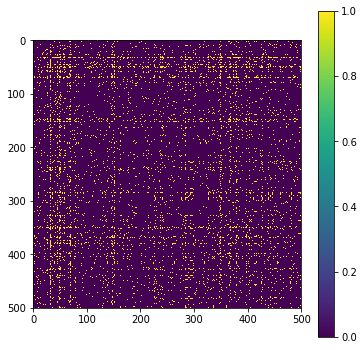

In [4]:
N = 500
R = 8.0
alpha = 0.8
T = 0.1

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
#G.plot()

In [5]:
A.sum().item()/N**2

0.060776

# Free R

In [6]:

r_zzz = noise_r(r, R, rel_var=0.1)
phi_zzz = noise_phi(theta, 0.1)

r_loc_init = logit(r/R)
r_scale_init = (torch.ones([N])/8).log()
phi_loc_init = polar2cart(1, theta)
phi_scale_init = (torch.ones([N])*100).log()
R_conc_init = torch.tensor(10.).log()
R_scale_init = torch.tensor(1.).log()
alpha_conc_init = torch.tensor(.5).log()
alpha_scale_init = torch.tensor(.5).log()
T_init = torch.tensor([3.,10.]).log()
dataloader = DataLoader(EdgesDataset(A, directed=False, diagonal=False), 
                        batch_size=int(N*16), num_workers=0, shuffle=True)
vi = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                'rs_scale':r_scale_init,
                              'phis_loc':phi_loc_init,
                              'phis_scale':phi_scale_init, 
                              'R_conc':R_conc_init, 
                              'R_scale':R_scale_init,
                              'alpha_conc':alpha_conc_init,
                              'alpha_scale':alpha_scale_init,
                              'T':T_init},
           fixed={'R':None, 
                  'T':0.1,
                  'alpha':0.75},
           priors={'R_p':torch.tensor([20., 0.4]), 
                    'T_p':torch.tensor([1., 15.]),
                    'alpha_p':torch.tensor([27., 0.03])},)

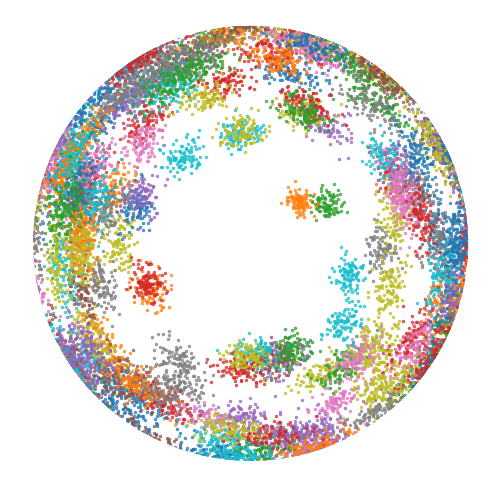

In [7]:
nodes = vi.posterior_samples(100)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
for i in range(N):
    ax.scatter(nodes[:,i,1].numpy(), nodes[:,i,0].numpy(), alpha=0.7, s=6)
#ax.scatter(theta.numpy(), r.numpy(), alpha=0.7, s=6, color='black')
#for link in A.nonzero():
#    ax.plot(theta[link].numpy(), r[link].numpy(), color='gray', alpha=0.2)
ax.set_rmax(R*1.02)
ax.set_rticks([]) 
ax.set_axis_off()
plt.show()
#print('Likelihood:', vi.likelihood())

In [8]:
vi.train(dataloader, lrs=[0.1, 0.05, 0.01], debug=False, epochs=[60,60,120])

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 54895.95 | Epoch time 4.67
Epoch 2 | LR: 0.10 | Total loss: 50834.62 | Epoch time 4.25
Epoch 3 | LR: 0.10 | Total loss: 47443.39 | Epoch time 4.46
Epoch 4 | LR: 0.10 | Total loss: 44771.52 | Epoch time 3.92
Epoch 5 | LR: 0.10 | Total loss: 42745.61 | Epoch time 5.05
Epoch 6 | LR: 0.10 | Total loss: 42130.06 | Epoch time 4.67
Epoch 7 | LR: 0.10 | Total loss: 40394.57 | Epoch time 4.42
Epoch 8 | LR: 0.10 | Total loss: 40375.62 | Epoch time 4.68
Epoch 9 | LR: 0.10 | Total loss: 39859.09 | Epoch time 4.63
Epoch 10 | LR: 0.10 | Total loss: 36816.90 | Epoch time 4.84
Epoch 11 | LR: 0.10 | Total loss: 37280.29 | Epoch time 3.54
Epoch 12 | LR: 0.10 | Total loss: 36215.92 | Epoch time 4.43
Epoch 13 | LR: 0.10 | Total loss: 34385.64 | Epoch time 3.50
Epoch 14 | LR: 0.10 | Total loss: 34446.22 | Epoch time 3.96
Epoch 15 | LR: 0.10 | Total loss: 35078.21 | Epoch time 4.85
Epoch 16 | LR: 0.10 | Total loss: 32840.81 | Epoch time 4.50
Ep

 ../src/utils.py:126: UserWarning:edes_prob_arg has NaN in it! 


Epoch 88 | LR: 0.05 | Total loss: 10409.32 | Epoch time 4.09
Epoch 89 | LR: 0.05 | Total loss: 10220.50 | Epoch time 4.62
Epoch 90 | LR: 0.05 | Total loss: 10243.27 | Epoch time 3.91
Epoch 91 | LR: 0.05 | Total loss: 10077.91 | Epoch time 4.27
Epoch 92 | LR: 0.05 | Total loss: 9580.38 | Epoch time 3.57
Epoch 93 | LR: 0.05 | Total loss: 9595.35 | Epoch time 3.33
Epoch 94 | LR: 0.05 | Total loss: 9360.84 | Epoch time 3.87
Epoch 95 | LR: 0.05 | Total loss: 9486.21 | Epoch time 3.99
Epoch 96 | LR: 0.05 | Total loss: 9190.16 | Epoch time 4.43
Epoch 97 | LR: 0.05 | Total loss: 8706.54 | Epoch time 3.47
Epoch 98 | LR: 0.05 | Total loss: 8901.99 | Epoch time 3.90
Epoch 99 | LR: 0.05 | Total loss: 9372.27 | Epoch time 4.12
Epoch 100 | LR: 0.05 | Total loss: 9039.37 | Epoch time 4.03
Epoch 101 | LR: 0.05 | Total loss: 9099.47 | Epoch time 3.87
Epoch 102 | LR: 0.05 | Total loss: 8505.73 | Epoch time 3.56
Epoch 103 | LR: 0.05 | Total loss: 8560.57 | Epoch time 4.63
Epoch 104 | LR: 0.05 | Total los

Epoch 223 | LR: 0.01 | Total loss: 5242.59 | Epoch time 4.75
Epoch 224 | LR: 0.01 | Total loss: 5026.18 | Epoch time 4.68
Epoch 225 | LR: 0.01 | Total loss: 5468.28 | Epoch time 4.52
Epoch 226 | LR: 0.01 | Total loss: 5224.30 | Epoch time 4.81
Epoch 227 | LR: 0.01 | Total loss: 5323.98 | Epoch time 4.65
Epoch 228 | LR: 0.01 | Total loss: 5183.99 | Epoch time 4.89
Epoch 229 | LR: 0.01 | Total loss: 5498.73 | Epoch time 4.72
Epoch 230 | LR: 0.01 | Total loss: 5255.50 | Epoch time 4.74
Epoch 231 | LR: 0.01 | Total loss: 5333.04 | Epoch time 4.43
Epoch 232 | LR: 0.01 | Total loss: 5169.38 | Epoch time 5.69
Epoch 233 | LR: 0.01 | Total loss: 5119.72 | Epoch time 6.63
Epoch 234 | LR: 0.01 | Total loss: 5321.35 | Epoch time 5.08
Epoch 235 | LR: 0.01 | Total loss: 5285.63 | Epoch time 5.09
Epoch 236 | LR: 0.01 | Total loss: 5370.66 | Epoch time 4.82
Epoch 237 | LR: 0.01 | Total loss: 5195.58 | Epoch time 4.73
Epoch 238 | LR: 0.01 | Total loss: 5053.33 | Epoch time 4.20
Epoch 239 | LR: 0.01 | T

In [9]:
vi.likelihood(debug=False)

-3854.907288247578

In [10]:
def hrg_likelihood_T0(A, r, phi_polar, R, T, alpha, debug=False):
    eps = -1e+10
    n = len(r)
    edges = torch.where(A>0, 
                            torch.ones(A.size()), 
                            torch.zeros(A.size()))
    l1e_a_ri = log1mexp(alpha*r*2)
    #print(l1e_a_ri.sum())
    l1e_a_R = log1mexp(alpha*R)
   # print(l1e_a_R)
    a_R_ri = alpha * (r-R)
    #print(a_R_ri.sum())
    r_matrix = r.expand(n,n)
    phi_matrix = phi_polar.expand(n,n)
    hd = hyperdist(r_matrix, r_matrix.t(), phi_matrix, phi_matrix.t())
    if T==0:
        threshold = torch.where(hd<R,
                                torch.zeros(hd.size()),
                                torch.ones(hd.size())*eps)
        threshold_ = torch.where(hd<R,
                                torch.ones(hd.size())*eps,
                                torch.zeros(hd.size()))
        
        #threshold = torch.clamp(((cd*2).log()<R).float(), min=1e-2)
        #print(threshold)
        lp = torch.where(edges==1,
                        threshold,
                        threshold_)
        #lp = edges*(threshold.log()) + (1-edges)*(1-threshold).log()
    else:
        l1pe = (hd-R)/(2*T)
        lp = edges*(-log1pexp(l1pe)) + (1-edges)*(log1pexp_(l1pe))
    lp = lp.triu(diagonal=1)
    #print(lp)
    if debug: print('Prob edges >>', lp.sum().item())
    if debug: print('a_R_ri  >>', (a_R_ri+l1e_a_ri).sum().item())
    if debug: print('Alpha       >>', alpha.log().item())
    if debug: print('l1e_a_R     >>', 2*l1e_a_R.item())
    out = lp.sum() + (a_R_ri+l1e_a_ri).sum() + alpha.log() \
        - torch.tensor(np.pi*2).log() - 2*l1e_a_R
    return lp

In [11]:
# Original values, T=0
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.), torch.tensor(alpha), debug=True).sum()

Prob edges >> -10980001054720.0
a_R_ri  >> -481.54788525505415
Alpha       >> -0.2231435328722
l1e_a_R     >> -0.0033258781768381596


tensor(-1.0980e+13)

In [12]:
# Original values except T=0.1
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.1), torch.tensor(alpha), debug=True).sum()

Prob edges >> -2524.525548138357
a_R_ri  >> -481.54788525505415
Alpha       >> -0.2231435328722
l1e_a_R     >> -0.0033258781768381596


tensor(-2524.5255, dtype=torch.float64)

In [13]:
r_, phi_, R_, T_, alpha_ = vi.qmean()
R_, T_, alpha_

(tensor(8.1197, dtype=torch.float64),
 tensor(0.1000, dtype=torch.float64),
 tensor(0.7500, dtype=torch.float64))

In [14]:
# Estimated values
lp = hrg_likelihood_T0(A, r_, c2d(phi_), R_, T_ , alpha_, debug=True)

Prob edges >> -2892.0061234654368
a_R_ri  >> -473.7911092748232
Alpha       >> -0.2876820724517809
l1e_a_R     >> -0.004536844772732701


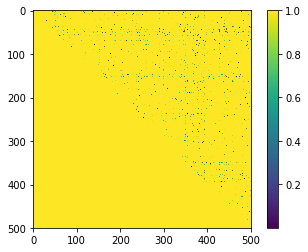

In [15]:
np.set_printoptions(precision=2)
plt.imshow(lp.exp())
plt.colorbar()
plt.show()

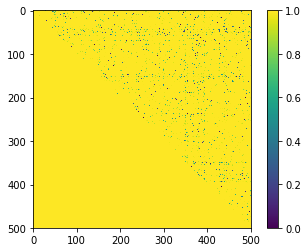

In [16]:
A_lh = vi.get_A_lh(dataloader)
plt.imshow(A_lh.exp())
plt.colorbar()
plt.show()

In [17]:
A_lh.sum()

tensor(-3670.5121, dtype=torch.float64)

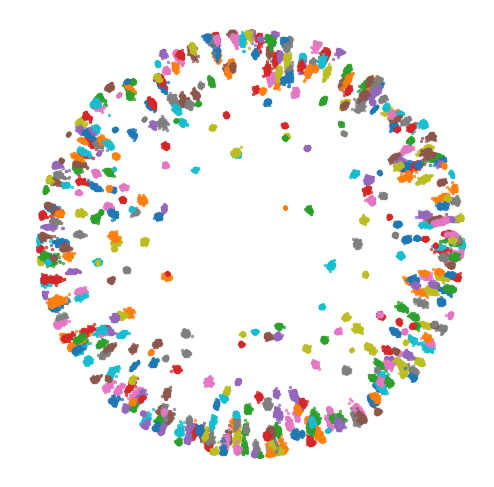

Likelihood: -3878.524528987107


In [18]:
nodes = vi.posterior_samples(100)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
for i in range(N):
    ax.scatter(nodes[:,i,1].numpy(), nodes[:,i,0].numpy(), alpha=0.7, s=6)
#ax.scatter(theta.numpy(), r.numpy(), alpha=0.7, s=6, color='black')
#for link in A.nonzero():
#    ax.plot(theta[link].numpy(), r[link].numpy(), color='gray', alpha=0.2)
ax.set_rmax(R_*1.02)
ax.set_rticks([]) 
ax.set_axis_off()
plt.show()
print('Likelihood:', vi.likelihood())

In [19]:
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.001), torch.tensor(alpha), debug=True).sum()

Prob edges >> -125042.16103732596
a_R_ri  >> -481.54788525505415
Alpha       >> -0.2231435328722
l1e_a_R     >> -0.0033258781768381596


tensor(-125042.1610, dtype=torch.float64)

In [20]:
hrg_likelihood_T0(A, r, theta, torch.tensor(R), torch.tensor(0.0001), torch.tensor(alpha), debug=False).sum()

tensor(-1250300.7625, dtype=torch.float64)

# Fixed R

In [21]:
vi_fix = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                'rs_scale':r_scale_init,
                              'phis_loc':phi_loc_init,
                              'phis_scale':phi_scale_init, 
                              'R_conc':R_conc_init, 
                              'R_scale':R_scale_init,
                              'alpha_conc':alpha_conc_init,
                              'alpha_scale':alpha_scale_init,
                              'T':T_init},
           fixed={'R':8.0, 
                  'T':0.1,
                  'alpha':0.75},
           priors={'R_p':torch.tensor([20., 0.4]), 
                    'T_p':torch.tensor([1., 15.]),
                    'alpha_p':torch.tensor([27., 0.03])},)

In [22]:
vi_fix.train(dataloader, lrs=[0.1, 0.05, 0.01], debug=False, epochs=[60,60,120])

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 34548.03 | Epoch time 4.79
Epoch 2 | LR: 0.10 | Total loss: 29553.59 | Epoch time 5.58
Epoch 3 | LR: 0.10 | Total loss: 26912.06 | Epoch time 6.32
Epoch 4 | LR: 0.10 | Total loss: 25040.81 | Epoch time 5.33
Epoch 5 | LR: 0.10 | Total loss: 23764.66 | Epoch time 5.06
Epoch 6 | LR: 0.10 | Total loss: 22538.80 | Epoch time 5.06
Epoch 7 | LR: 0.10 | Total loss: 21655.18 | Epoch time 4.72
Epoch 8 | LR: 0.10 | Total loss: 21113.52 | Epoch time 4.83
Epoch 9 | LR: 0.10 | Total loss: 20074.59 | Epoch time 4.83
Epoch 10 | LR: 0.10 | Total loss: 19626.94 | Epoch time 5.99
Epoch 11 | LR: 0.10 | Total loss: 19175.45 | Epoch time 5.06
Epoch 12 | LR: 0.10 | Total loss: 18446.13 | Epoch time 5.43
Epoch 13 | LR: 0.10 | Total loss: 18246.13 | Epoch time 4.16
Epoch 14 | LR: 0.10 | Total loss: 17800.40 | Epoch time 4.60
Epoch 15 | LR: 0.10 | Total loss: 17103.65 | Epoch time 3.92
Epoch 16 | LR: 0.10 | Total loss: 16907.72 | Epoch time 4.35
Ep

Epoch 136 | LR: 0.01 | Total loss: 4674.22 | Epoch time 3.81
Epoch 137 | LR: 0.01 | Total loss: 4665.74 | Epoch time 4.37
Epoch 138 | LR: 0.01 | Total loss: 4860.50 | Epoch time 4.47
Epoch 139 | LR: 0.01 | Total loss: 4794.67 | Epoch time 4.21
Epoch 140 | LR: 0.01 | Total loss: 4728.83 | Epoch time 4.70
Epoch 141 | LR: 0.01 | Total loss: 4725.14 | Epoch time 4.09
Epoch 142 | LR: 0.01 | Total loss: 4723.77 | Epoch time 4.81
Epoch 143 | LR: 0.01 | Total loss: 4708.13 | Epoch time 4.98
Epoch 144 | LR: 0.01 | Total loss: 4682.09 | Epoch time 5.16
Epoch 145 | LR: 0.01 | Total loss: 4680.94 | Epoch time 5.07
Epoch 146 | LR: 0.01 | Total loss: 4690.79 | Epoch time 4.12
Epoch 147 | LR: 0.01 | Total loss: 4678.23 | Epoch time 4.82
Epoch 148 | LR: 0.01 | Total loss: 4646.85 | Epoch time 4.26
Epoch 149 | LR: 0.01 | Total loss: 4609.56 | Epoch time 3.88
Epoch 150 | LR: 0.01 | Total loss: 4628.33 | Epoch time 3.97
Epoch 151 | LR: 0.01 | Total loss: 4612.20 | Epoch time 4.05
Epoch 152 | LR: 0.01 | T

In [23]:
r_, phi_, R_, T_, alpha_ = vi_fix.qmean()
R_, T_, alpha_

(tensor(8., dtype=torch.float64),
 tensor(0.1000, dtype=torch.float64),
 tensor(0.7500, dtype=torch.float64))

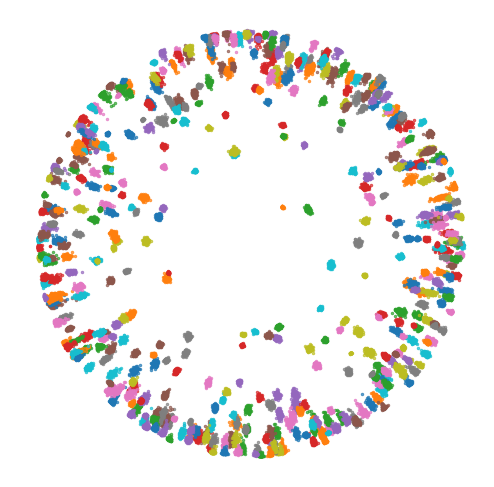

Likelihood: -2981.249814691105


In [24]:
nodes = vi_fix.posterior_samples(100)
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
for i in range(N):
    ax.scatter(nodes[:,i,1].numpy(), nodes[:,i,0].numpy(), alpha=0.7, s=6)
#ax.scatter(theta.numpy(), r.numpy(), alpha=0.7, s=6, color='black')
#for link in A.nonzero():
#    ax.plot(theta[link].numpy(), r[link].numpy(), color='gray', alpha=0.2)
ax.set_rmax(R_*1.02)
ax.set_rticks([]) 
ax.set_axis_off()
plt.show()
print('Likelihood:', vi_fix.likelihood())